<a href="https://colab.research.google.com/github/rgborges/DataScienceProjects/blob/master/Admission_Analysis_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Context**
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

**Content**
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

**Acknowledgements**
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

**Inspiration**
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

**Citation**
Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [0]:
!pip install plotnine

# Importação dos Dados e das Bibliotecas

A seguir vamos importar as biliotecas: 


*   ```Pandas```: Biblioteca para manipulação de tabelas.
*   ```Numpy```: Manipulação de dados númericos e matrizes.
*   ```Matplot Lib```: Biblioteca para plotar gráficos.
*   Seaborn: Biblioteca estatítca para visualização de dados.





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *
from plotnine.data import mpg
%matplotlib inline



In [0]:
 file = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/Dataset - Graduation Program/Admission_Predict.csv',
                    header=None,
                    skiprows=[0],
                    names=['Id',
                           'GRE_Score',
                           'TOEFL_Score',
                           'University_Rate',
                           'SOP',
                           'LOR',
                           'CGPA',
                           'Research',
                           'Chance_of_Admit'])

In [0]:
df = file

In [0]:
df.head(10)

,GRE_Score,TOEFL_Score,University_Rate,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [0]:
df = df.drop('Id', 1)
df.describe(include='all')

,GRE_Score,TOEFL_Score,University_Rate,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Análise Exploratória

Nesta sessão estou tentando avaliar as relações das variáveis com a de chance de admissão. A pergunta a ser resolvida é quais atributos mais aumentam as minhas chances de ser admitido.

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


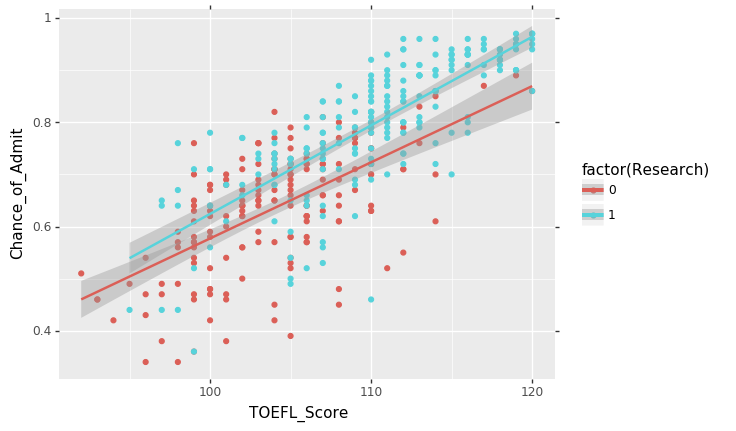

<ggplot: (-9223363277444550733)>

In [0]:
(ggplot(df, aes(x = 'TOEFL_Score', y = 'Chance_of_Admit',
                color = 'factor(Research)')) +
 geom_point() +
 geom_smooth(method= 'lm')
)

In [0]:
(ggplot(df, aes(x = 'CGPA', y = 'Chance_of_Admit')) +
 geom_point() +
 geom_smooth(method= 'lm')
)

In [0]:
(ggplot(df, aes(x = 'GRE_Score', y = 'Chance_of_Admit')) +
 geom_point()
)

Os que tiveram pesquisas relacionadas aos seus perfis tiveram mais chances de serem admitidos. O gráfico a seguir mostra a dsitribuição dos candidatos que fizeram e não fizeram pesquisa.

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


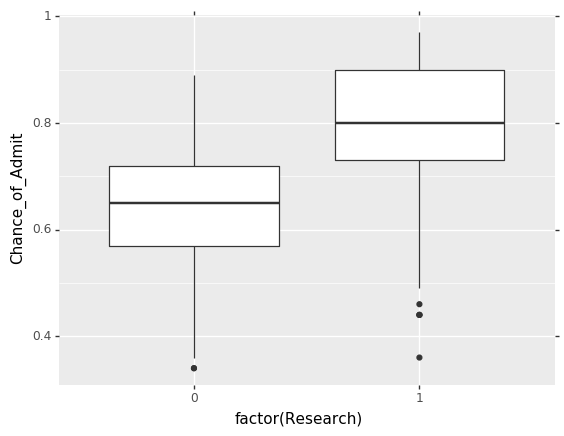

<ggplot: (-9223363277440261046)>

In [0]:
(ggplot(df, aes(x = 'factor(Research)', y = 'Chance_of_Admit')) +
 geom_boxplot()
)

# Correlação entre TOEFL Score x Chance of Admit

In [0]:
x = df['TOEFL_Score']
y = df['Chance_of_Admit']
correlation_toefl_ca = np.corrcoef(x, y)
correlation_toefl_ca

array([[1.        , 0.79159399],
       [0.79159399, 1.        ]])

# Correlações

In [0]:
corr_table = df.corr()
corr_table

,Id,GRE_Score,TOEFL_Score,University_Rate,SOP,LOR,CGPA,Research,Chance_of_Admit
Id,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rate,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


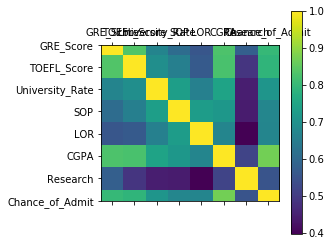

In [0]:
plt.matshow(corr_table)
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

Podemos ver pelo gráfico de correlações que CGPA, GRE_Score e TOEFL_Score são altamente correlacionados com a Chance de admissão.

# Regressão Linear

Podemos ver com as análises acima que as variáveis independentes tem uma relação linear com a variável dependente 'Chance de Admissão'.



In [0]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats

In [0]:
y = df[['Chance_of_Admit']]
y

,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [0]:
X = df[['GRE_Score']+['TOEFL_Score']+['University_Rate']+['SOP']+['LOR']+['CGPA']]
X

,GRE_Score,TOEFL_Score,University_Rate,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [0]:
X1 = sm.add_constant(X)
admission_model1 = sm.OLS(y, X1).fit()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#Imprime a tabela do modelo linear
print(admission_model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     259.9
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.99e-133
Time:                        18:16:58   Log-Likelihood:                 532.59
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     393   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4139      0.115    -

In [0]:
#Realiza a função para o estimador VIF, a fim de removermos variáveis com multicoinearidade
def vif_cal(input_data, dependent_col):
  import statsmodels.formula.api as smf
  x_vars = input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0, xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=smf.ols(formula="y~x", data = x_vars).fit().rsquared
    vif=round(1/(1-rsq), 2)
    print(xvar_names[i], "VIF = ", vif)


vif_cal(input_data=df, dependent_col="Chance_of_Admit")

GRE_Score VIF =  4.62
TOEFL_Score VIF =  4.29
University_Rate VIF =  2.92
SOP VIF =  3.08
LOR VIF =  2.43
CGPA VIF =  5.21
Research VIF =  1.54


In [0]:
X = df[['GRE_Score']+['TOEFL_Score']+['University_Rate']+['SOP']+['LOR']]
X1 = sm.add_constant(X)
admission_model2 = sm.OLS(y, X1).fit()
print(admission_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     236.9
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          2.41e-116
Time:                        18:18:48   Log-Likelihood:                 489.59
No. Observations:                 400   AIC:                            -967.2
Df Residuals:                     394   BIC:                            -943.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5448      0.128    -

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:

lm = linear_model.LinearRegression() # cria a classe de modelo linear


In [0]:
X = df[['GRE_Score']+['TOEFL_Score']+['University_Rate']+['SOP']+['LOR']+['Research']]
y = df[['Chance_of_Admit']]
model = lm.fit(X, y) #treina o modelo

# Teste de Predição Simples
Predição simples dentro do modelo linear. Uma outra abordagem seria dividir a base de dados de treinamento e de predição para calcularmos a acurácia do modelo.


In [0]:
predictions = lm.predict(X)
col = ['prediction']
table = pd.DataFrame(data = predictions, columns=col)
table['real'] = df['Chance_of_Admit']
table['error'] = table['real'] - table['prediction']
print(table)

     prediction  real     error
0      0.933918  0.92 -0.013918
1      0.812632  0.76 -0.052632
2      0.710718  0.72  0.009282
3      0.740335  0.80  0.059665
4      0.634996  0.65  0.015004
..          ...   ...       ...
395    0.781467  0.82  0.038533
396    0.764761  0.84  0.075239
397    0.896134  0.91  0.013866
398    0.681111  0.67 -0.011111
399    0.897535  0.95  0.052465

[400 rows x 3 columns]


In [0]:
r_sq = lm.score(X, y)
print('r squared: ', r_sq)
print('intercept:', lm.intercept_)
print('coefficients:', lm.coef_)

r squared:  0.7559718358375903
intercept: [-1.37710675]
coefficients: [[0.00395335 0.00615413 0.01420392 0.00439464 0.03322581 0.02645009]]


fórmula: GRSCORE*0.00395335 + TOEFL_Score*0.00615413 + University_Rate*0.01420392 + SOP*0.03322581 + LOR*0.02645009 - 1.37710675
